In [3]:
import pandas as pd 
import numpy as np
import gzip

In [4]:
xferlog = pd.read_csv('xferlog-20230814.gz', compression='gzip', header=0, sep=' ', quotechar='"', error_bad_lines=False)
haproxy = pd.read_csv('haproxy.gz', compression='gzip', header=0, sep=' ', quotechar='"', error_bad_lines=False)


<ipython-input-4-54e4ba56d4ca>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  xferlog = pd.read_csv('xferlog-20230814.gz', compression='gzip', header=0, sep=' ', quotechar='"', error_bad_lines=False)
<ipython-input-4-54e4ba56d4ca>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  haproxy = pd.read_csv('haproxy.gz', compression='gzip', header=0, sep=' ', quotechar='"', error_bad_lines=False)
Skipping line 42544: expected 14 fields, saw 34
Skipping line 43992: expected 14 fields, saw 30
Skipping line 44064: expected 14 fields, saw 34
Skipping line 44457: expected 14 fields, saw 30



In [5]:
xferlog.head(10)

,Sun,Aug,13,23:25:48,2023,0,10.136.152.254,4877,/opt/data01/xbid_elering_prod/IN/cmi/A13_EE_12082023T155702S225748.xml,b,_,i,r,xbid_elering_prod,sftp,0.1,*,c
0,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1136,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_7...,b,_,i,r,xbid_np_prod,sftp,0,*,c
1,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_9...,b,_,i,r,xbid_np_prod,sftp,0,*,c
2,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_6...,b,_,i,r,xbid_np_prod,sftp,0,*,c
3,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_c...,b,_,i,r,xbid_np_prod,sftp,0,*,c
4,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_7...,b,_,i,r,xbid_np_prod,sftp,0,*,c
5,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_3...,b,_,i,r,xbid_np_prod,sftp,0,*,c
6,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_9...,b,_,i,r,xbid_np_prod,sftp,0,*,c
7,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1136,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_9...,b,_,i,r,xbid_np_prod,sftp,0,*,c
8,Sun,Aug,13,23:25:52,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_6...,b,_,i,r,xbid_np_prod,sftp,0,*,c
9,Sun,Aug,13,23:25:52,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_f...,b,_,i,r,xbid_np_prod,sftp,0,*,c


# XFERLOG

In [6]:
## renaming the columsn
xferlog = xferlog.rename(columns={"Sun":"Day","Aug":"Month", "13":"Day","23:25:48":"time", "/opt/data01/xbid_elering_prod/IN/cmi/A13_EE_12082023T155702S225748.xml":"files", "b":"xferlog_attr1","r":"xferlog_attr2","xbid_elering_prod":"user_name","c":"xferlog_attr3"}, index={8:"sftp_channel"})

In [7]:
xferlog.head(5)

,Day,Month,Day,time,2023,0,10.136.152.254,4877,files,xferlog_attr1,_,i,xferlog_attr2,user_name,sftp,0.1,*,xferlog_attr3
0,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1136,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_7...,b,_,i,r,xbid_np_prod,sftp,0,*,c
1,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_9...,b,_,i,r,xbid_np_prod,sftp,0,*,c
2,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_6...,b,_,i,r,xbid_np_prod,sftp,0,*,c
3,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_c...,b,_,i,r,xbid_np_prod,sftp,0,*,c
4,Sun,Aug,13,23:25:51,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_7...,b,_,i,r,xbid_np_prod,sftp,0,*,c


In [18]:
xferlog['user_name'].value_counts()

xbid_np_prod                3286
xbid_svk_prod               1157
xbid_finngrid_prod           288
xbid_ceps_prod               239
xbid_transelectrica_prod     195
xbid_terna_prod              158
xbid_seps_prod               153
xbid_50hertz_prod            148
xbid_elering_prod            134
xbid_eso_prod                109
xbid_cropex_prod             106
xbid_tennetde_prod           104
xbid_eles_prod                83
xbid_hops_prod                35
xbid_tge_prod                  6
xbid_pse_prod                  4
Name: user_name, dtype: int64

In [41]:
xferlog.groupby(['i',"user_name"]).count()

Day  Month   Day  time  2023     0  \
i user_name                                                       
d xbid_50hertz_prod           60     60    60    60    60    60   
  xbid_ceps_prod              90     90    90    90    90    90   
  xbid_elering_prod           65     65    65    65    65    65   
  xbid_eles_prod              13     13    13    13    13    13   
  xbid_eso_prod               34     34    34    34    34    34   
  xbid_finngrid_prod         144    144   144   144   144   144   
  xbid_hops_prod              11     11    11    11    11    11   
  xbid_np_prod               993    993   993   993   993   993   
  xbid_pse_prod                2      2     2     2     2     2   
  xbid_seps_prod              51     51    51    51    51    51   
  xbid_svk_prod              382    382   382   382   382   382   
  xbid_tennetde_prod          31     31    31    31    31    31   
  xbid_terna_prod             51     51    51    51    51    51   
  xbid_transelectrica_prod    63     63    63    63    63    63   
i xbid_50hertz_prod           12     12    12    12    12    12   
  xbid_ceps_prod              59     59    59    59    59    59   
  xbid_cropex_prod            55     55    55    55    55    55   
  xbid_elering_prod            4      4     4     4     4     4   
  xbid_eles_prod              57     57    57    57    57    57   
  xbid_eso_prod               41     41    41    41    41    41   
  xbid_hops_prod              13     13    13    13    13    13   
  xbid_np_prod              1300   1300  1300  1300  1300  1300   
  xbid_seps_prod              39     39    39    39    39    39   
  xbid_svk_prod              389    389   389   389   389   389   
  xbid_tennetde_prod          42     42    42    42    42    42   
  xbid_terna_prod             56     56    56    56    56    56   
  xbid_tge_prod                6      6     6     6     6     6   
  xbid_transelectrica_prod    69     69    69    69    69    69   
o xbid_50hertz_prod           76     76    76    76    76    76   
  xbid_ceps_prod              90     90    90    90    90    90   
  xbid_cropex_prod            51     51    51    51    51    51   
  xbid_elering_prod           65     65    65    65    65    65   
  xbid_eles_prod              13     13    13    13    13    13   
  xbid_eso_prod               34     34    34    34    34    34   
  xbid_finngrid_prod         144    144   144   144   144   144   
  xbid_hops_prod              11     11    11    11    11    11   
  xbid_np_prod               993    993   993   993   993   993   
  xbid_pse_prod                2      2     2     2     2     2   
  xbid_seps_prod              63     63    63    63    63    63   
  xbid_svk_prod              386    386   386   386   386   386   
  xbid_tennetde_prod          31     31    31    31    31    31   
  xbid_terna_prod             51     51    51    51    51    51   
  xbid_transelectrica_prod    63     63    63    63    63    63   

                            10.136.152.254  4877  files  xferlog_attr1     _  \
i user_name                                                                    
d xbid_50hertz_prod                     60    60     60             60    60   
  xbid_ceps_prod                        90    90     90             90    90   
  xbid_elering_prod                     65    65     65             65    65   
  xbid_eles_prod                        13    13     13             13    13   
  xbid_eso_prod                         34    34     34             34    34   
  xbid_finngrid_prod                   144   144    144            144   144   
  xbid_hops_prod                        11    11     11             11    11   
  xbid_np_prod                         993   993    993            993   993   
  xbid_pse_prod                          2     2      2              2     2   
  xbid_seps_prod                        51    51     51             51    51   
  xbid_svk_prod                        382   382    3

In [42]:
xferlog['time'] = xferlog['time'].apply(lambda x:x[1])  ##only get the hours

In [44]:
xferlog

,Day,Month,Day,time,2023,0,10.136.152.254,4877,files,xferlog_attr1,_,i,xferlog_attr2,user_name,sftp,0.1,*,xferlog_attr3
0,Sun,Aug,13,3,2023,0,10.136.152.254,1136,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_7...,b,_,i,r,xbid_np_prod,sftp,0,*,c
1,Sun,Aug,13,3,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_9...,b,_,i,r,xbid_np_prod,sftp,0,*,c
2,Sun,Aug,13,3,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_6...,b,_,i,r,xbid_np_prod,sftp,0,*,c
3,Sun,Aug,13,3,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_c...,b,_,i,r,xbid_np_prod,sftp,0,*,c
4,Sun,Aug,13,3,2023,0,10.136.152.254,1137,/opt/data01/xbid_np_prod/IN/cmi/20230813_ACK_7...,b,_,i,r,xbid_np_prod,sftp,0,*,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,Mon,Aug,14,4,2023,0,10.136.152.254,1144,/opt/data01/xbid_svk_prod/IN/cmi/1054406.xml,b,_,i,r,xbid_svk_prod,sftp,0,*,c
6201,Mon,Aug,14,4,2023,0,10.136.152.254,1145,/opt/data01/xbid_svk_prod/IN/cmi/1054407.xml,b,_,i,r,xbid_svk_prod,sftp,0,*,c
6202,Mon,Aug,14,4,2023,0,10.136.152.254,1144,/opt/data01/xbid_svk_prod/IN/cmi/1054408.xml,b,_,i,r,xbid_svk_prod,sftp,0,*,c
6203,Mon,Aug,14,4,2023,0,10.136.152.254,1144,/opt/data01/xbid_svk_prod/IN/cmi/1054409.xml,b,_,i,r,xbid_svk_prod,sftp,0,*,c


In [54]:

xferlog['time'].value_counts()

3    2187
0    1511
2    1008
1     840
4     659
Name: time, dtype: int64

- below we see how many request went to each channel on 17/18

In [16]:
import seaborn as sns 
sns.catplot(x = 'SubCategory' , y = "Profit", data = df,height=15,hue="Category"); # Distribution of profit margin among SubCategories


user_name                 xferlog_attr3  Day  Day  Month  time      2023  0  10.136.152.254  4877   files                                                                                                          xferlog_attr1  _  i  xferlog_attr2  sftp  0.1  *
xbid_50hertz_prod         c              Mon  14   Aug    04:15:11  2023  0  10.136.152.254  91515  /opt/data01/xbid_50hertz_prod/OUT/smi/20230814_CTS_4020_11XID-CAPACITY-9_50HzT_50HzT_141_1.xml                 b              _  o  r              sftp  0    *    2
                                         Sun  13   Aug    23:45:25  2023  0  10.136.152.254  91541  /opt/data01/xbid_50hertz_prod/OUT/smi/20230814_CTS_4011_11XID-CAPACITY-9_50HzT_50HzT_123_1.xml                 b              _  o  r              sftp  0    *    2
                                         Mon  14   Aug    01:15:10  2023  0  10.136.152.254  91437  /opt/data01/xbid_50hertz_prod/OUT/smi/20230814_CTS_4020_11XID-CAPACITY-9_50HzT_50HzT_129_1.xml                

## clean the data and get only the ips:

In [63]:
haproxy['ip'] = haproxy['ip'].str.split(":", expand=True)[0]

In [64]:
haproxy = haproxy[["Month","Day","time","ip","sftp_channel"]]

In [65]:
# get the minutes:
haproxy['minutes'] = haproxy['time'].apply(lambda x: x[3:5])

In [66]:
haproxy['time'] = haproxy['time'].apply(lambda x:x[1])  ##only get the hours

## Below we can clearly see the number of IPs went through haproxy.

In [83]:
haproxy['ip'].value_counts()

213.151.236.158    9164
195.225.127.58     9110
91.209.155.250     8128
5.32.184.10        7593
89.111.92.21       6770
185.81.228.10      5866
195.254.209.13     4325
85.237.226.122     4207
91.234.142.10      2784
81.89.18.164       2760
193.180.216.132    2690
91.208.150.250     2622
195.47.226.1       2595
195.254.158.52     1723
20.238.241.203     1436
78.28.114.85       1408
109.235.136.244    1371
185.165.105.254    1256
195.29.242.158     1154
193.108.204.83     1151
195.47.233.240     1112
193.148.125.75     1034
195.234.135.131     851
193.242.255.201     359
85.239.110.39       287
91.234.143.4        287
193.110.14.107      156
194.140.78.155       50
194.224.33.131       14
18.158.210.144       11
194.224.33.153        7
194.50.11.43          1
Name: ip, dtype: int64

## how many request forwarded to which sftp server

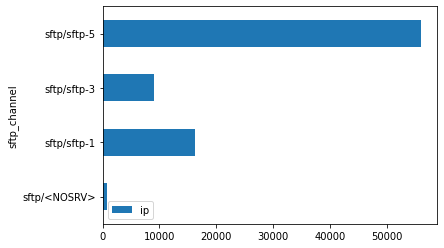

In [68]:
import seaborn as sns
haproxy.groupby("sftp_channel").agg({"ip":"count"}).plot.barh();

## issue occured exactly 07:01 on com5 host, therefore we need to check the connections exactly before it.

In [69]:
data_frame_1 = haproxy[(haproxy["time"] < "7")] #data before 6 am

In [70]:
data_frame_2 = data_frame_1[(data_frame_1["Day"] == 17)] #data on 17th

In [71]:
data_frame_3 =  data_frame_2[(data_frame_2['sftp_channel'] == "sftp/sftp-5")] #sftp channel 5 

In [72]:
data_frame_3 # now we have the data for our investigation

,Month,Day,time,ip,sftp_channel,minutes
22,Aug,17,3,193.108.204.83,sftp/sftp-5,10
26,Aug,17,3,109.235.136.244,sftp/sftp-5,10
27,Aug,17,3,91.209.155.250,sftp/sftp-5,10
45,Aug,17,3,78.28.114.85,sftp/sftp-5,10
60,Aug,17,3,193.148.125.75,sftp/sftp-5,11
...,...,...,...,...,...,...
74540,Aug,17,3,185.81.228.10,sftp/sftp-5,59
74542,Aug,17,3,91.234.142.10,sftp/sftp-5,59
74544,Aug,17,3,5.32.184.10,sftp/sftp-5,59
74545,Aug,17,3,91.209.155.250,sftp/sftp-5,59


In [73]:
data_frame_3['ip'].value_counts()  ## Here actually we can see before the 6 am, the IPs created the most connection:


213.151.236.158    3785
195.225.127.58     3178
91.209.155.250     2660
5.32.184.10        2619
185.81.228.10      2086
195.254.209.13     1437
85.237.226.122     1361
89.111.92.21       1130
193.180.216.132     935
91.234.142.10       931
195.47.226.1        900
81.89.18.164        863
91.208.150.250      817
20.238.241.203      498
195.254.158.52      495
78.28.114.85        492
109.235.136.244     462
185.165.105.254     434
195.47.233.240      390
193.148.125.75      345
195.29.242.158      338
195.234.135.131     283
193.108.204.83      185
193.242.255.201     106
194.140.78.155       24
85.239.110.39        22
193.110.14.107       18
91.234.143.4          9
18.158.210.144        8
194.224.33.153        3
194.224.33.131        1
Name: ip, dtype: int64

###  Here actually we can see before the 7 am, the IPs created the most connection:
- 213.151.236.158    3785
- 195.225.127.58     3178
- 91.209.155.250     2660

## I would like to see the time stamps of the our culpit ipS, for the day of17th:  

### ATTRIBUTES:
- TIME= shows us the every hours, and rest of the values is in count format, so every IP's requests over time(hours) of 17TH

# for the IP: 213.151.236.158

In [74]:
data_for_requests_for_213_151_236_158 = haproxy[haproxy['ip']=="213.151.236.158"]
data_for_requests_for_213_151_236_158 = data_for_requests_for_213_151_236_158[data_for_requests_for_213_151_236_158['Day']==17]
data_for_requests_for_213_151_236_158 = data_for_requests_for_213_151_236_158[data_for_requests_for_213_151_236_158['sftp_channel']=="sftp/sftp-5"]

In [75]:
data_for_requests_for_213_151_236_158.groupby(["time"]).count() ## this IP sent us 10k request mostly around 6-7 am., and nothing after 8am 

,Month,Day,ip,sftp_channel,minutes
time,,,,,
0,10,10,10,10,10
1,15,15,15,15,15
2,24,24,24,24,24
3,27,27,27,27,27
4,36,36,36,36,36
5,35,35,35,35,35
6,3638,3638,3638,3638,3638
7,5027,5027,5027,5027,5027
8,39,39,39,39,39


# for the IP: 195.225.127.58

In [76]:
data_for_requests_for_195_225_127_58 = haproxy[haproxy['ip']=="195.225.127.58"]
data_for_requests_for_195_225_127_58 = data_for_requests_for_195_225_127_58[data_for_requests_for_195_225_127_58["Day"] == 17]
data_for_requests_for_195_225_127_58 = data_for_requests_for_195_225_127_58[data_for_requests_for_195_225_127_58["sftp_channel"] == "sftp/sftp-5"]

In [77]:
data_for_requests_for_195_225_127_58.groupby(["time"]).count()

,Month,Day,ip,sftp_channel,minutes
time,,,,,
0,568,568,568,568,568
1,317,317,317,317,317
2,456,456,456,456,456
3,534,534,534,534,534
4,407,407,407,407,407
5,399,399,399,399,399
6,497,497,497,497,497
7,560,560,560,560,560
8,599,599,599,599,599


# for the IP: 91.209.155.250

In [78]:

data_for_requests_for_91_209_155_250 = haproxy[haproxy['ip']=="91.209.155.250"]
data_for_requests_for_91_209_155_250 = data_for_requests_for_91_209_155_250[data_for_requests_for_91_209_155_250["Day"] == 17]
data_for_requests_for_91_209_155_250 = data_for_requests_for_91_209_155_250[data_for_requests_for_91_209_155_250["sftp_channel"] == "sftp/sftp-5"]

In [79]:
data_for_requests_for_91_209_155_250.groupby(["time"]).count()

,Month,Day,ip,sftp_channel,minutes
time,,,,,
0,496,496,496,496,496
1,259,259,259,259,259
2,369,369,369,369,369
3,437,437,437,437,437
4,322,322,322,322,322
5,334,334,334,334,334
6,443,443,443,443,443
7,475,475,475,475,475
8,514,514,514,514,514


# # for the IP: 5.32.184.10

In [80]:


data_for_requests_for_5_32_184_10 = haproxy[haproxy['ip']=="5.32.184.10"]
data_for_requests_for_5_32_184_10 = data_for_requests_for_5_32_184_10[data_for_requests_for_5_32_184_10["Day"] == 17]
data_for_requests_for_5_32_184_10 = data_for_requests_for_5_32_184_10[data_for_requests_for_5_32_184_10["sftp_channel"] == "sftp/sftp-5"]

In [81]:
data_for_requests_for_5_32_184_10.groupby(["time"]).count()

,Month,Day,ip,sftp_channel,minutes
time,,,,,
0,658,658,658,658,658
1,220,220,220,220,220
2,317,317,317,317,317
3,371,371,371,371,371
4,268,268,268,268,268
5,253,253,253,253,253
6,532,532,532,532,532
7,655,655,655,655,655
8,657,657,657,657,657


# it's clearly visible that seps was sending 3-5 k requests in a short time while we are able to see data distribution is normal for the other IPs

# Lets check the minutes of the huge requests for 6 AM for the IP: 213.151.236.158

In [97]:
data_for_requests_for_213_151_236_158 = haproxy[haproxy['ip']=="213.151.236.158"]
data_for_requests_for_213_151_236_158 = data_for_requests_for_213_151_236_158[data_for_requests_for_213_151_236_158['Day']==17]
data_for_requests_for_213_151_236_158 = data_for_requests_for_213_151_236_158[data_for_requests_for_213_151_236_158['sftp_channel']=="sftp/sftp-5"]
data_for_requests_for_213_151_236_158 = data_for_requests_for_213_151_236_158[data_for_requests_for_213_151_236_158['time']=='6']

In [99]:
data_for_requests_for_213_151_236_158.groupby(['minutes']).count()

,Month,Day,time,ip,sftp_channel
minutes,,,,,
02,2,2,2,2,2
03,1,1,1,1,1
04,2,2,2,2,2
05,2,2,2,2,2
07,2,2,2,2,2
08,2,2,2,2,2
09,1,1,1,1,1
11,1,1,1,1,1
12,1,1,1,1,1


# Lets check the minutes of the huge requests for 7 AM for the IP: 213.151.236.158

In [100]:
data_for_requests_for_213_151_236_158 = haproxy[haproxy['ip']=="213.151.236.158"]
data_for_requests_for_213_151_236_158 = data_for_requests_for_213_151_236_158[data_for_requests_for_213_151_236_158['Day']==17]
data_for_requests_for_213_151_236_158 = data_for_requests_for_213_151_236_158[data_for_requests_for_213_151_236_158['sftp_channel']=="sftp/sftp-5"]
data_for_requests_for_213_151_236_158 = data_for_requests_for_213_151_236_158[data_for_requests_for_213_151_236_158['time']=='7']

In [101]:
data_for_requests_for_213_151_236_158.groupby(['minutes']).count()

,Month,Day,time,ip,sftp_channel
minutes,,,,,
00,87,87,87,87,87
01,85,85,85,85,85
02,87,87,87,87,87
03,88,88,88,88,88
04,87,87,87,87,87
05,85,85,85,85,85
06,86,86,86,86,86
07,87,87,87,87,87
08,88,88,88,88,88


In [102]:
! jupyter nbconvert --to html HAPROXY_LOG_analytics.ipynb


[NbConvertApp] Converting notebook HAPROXY_LOG_analytics.ipynb to html
[NbConvertApp] Writing 706353 bytes to HAPROXY_LOG_analytics.html
